+## TAKE HOME TEST - DESCRIPTIVE ANALYSIS

> ### Objective:
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### Dataset:
> - The Adult dataset, available at [Kaggle - Titanic](https://www.kaggle.com/c/titanic/data).
> - Contains data about the passengers aboard the Titanic, including age, gender, passenger class, and whether they survived or not.

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure.
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = "data/titanic_train.csv"

df = pd.read_csv(data)

In [ ]:
print("Rows x Column:", df.shape)

Rows x Column: (891, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

> In my opinion, there are no inappropriate columns based on the identification that has been done using `df.dtypes`.

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [8]:
print("Number of missing values:\n")
print(df.isna().sum())

Number of missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print("Percentage of missing values:\n")
(df.isnull().mean() * 100).round(2).astype(str) + '%'

Percentage of missing values:



PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [10]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
df = df.drop('Cabin', axis=1)

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
unique_embarked_values = df['Embarked'].unique()
print(unique_embarked_values)

['S' 'C' 'Q' nan]


In [17]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
df = df.dropna(subset=['Embarked'])

In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers:
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [20]:
df_num = df.select_dtypes(include = ['int64','float64'])

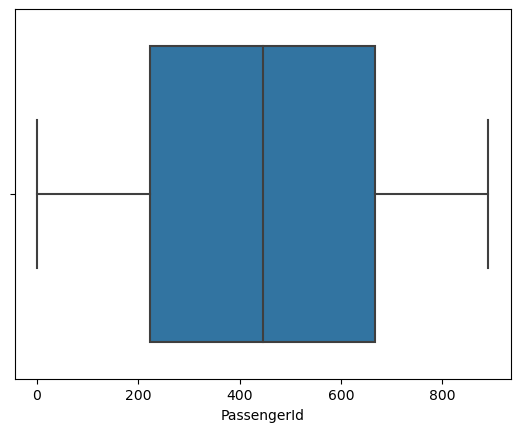

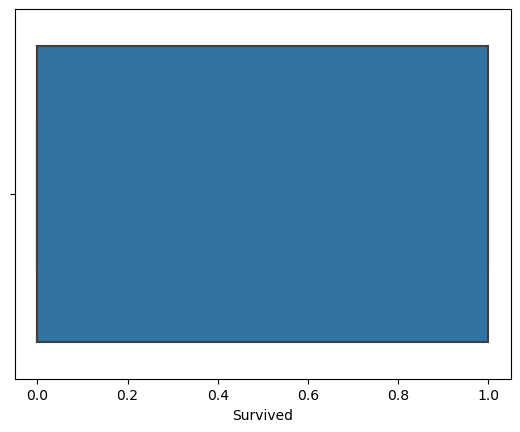

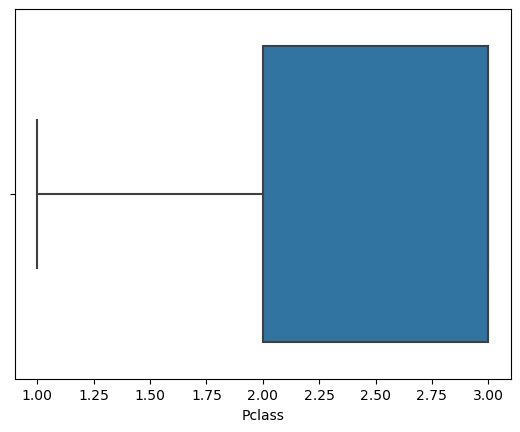

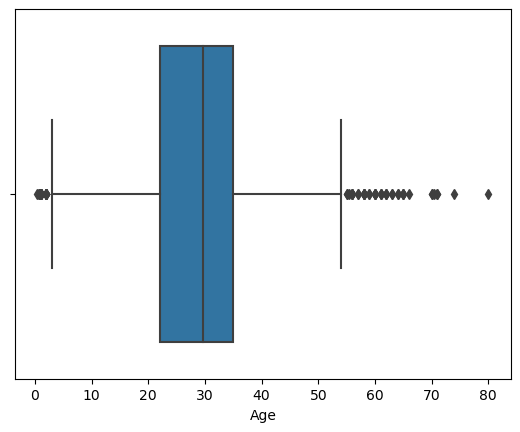

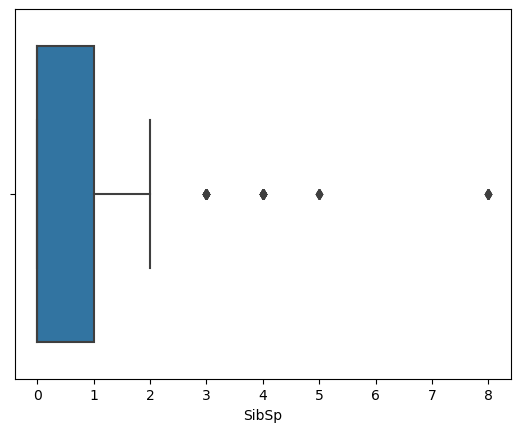

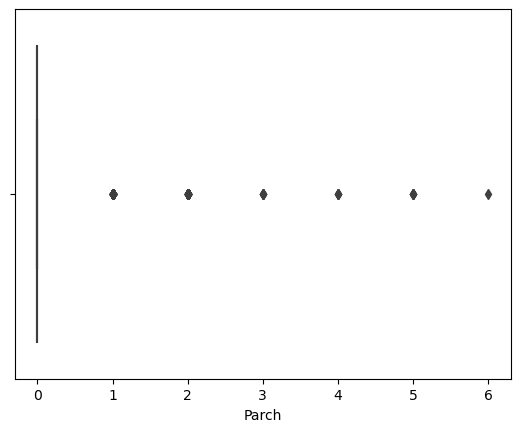

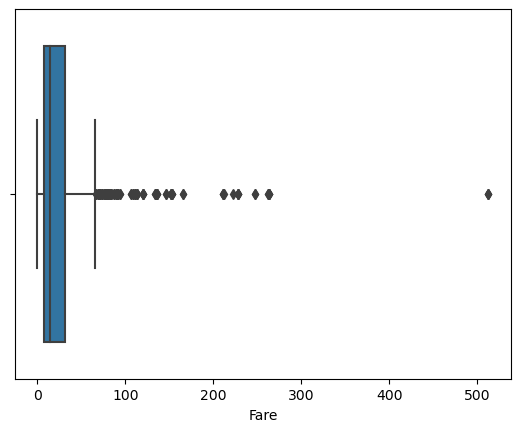

In [21]:
for i in df_num:
    sns.boxplot(data = df_num, x=i)
    plt.show()

In [22]:
def find_outliers(yourlist):
    Q1 = np.quantile(yourlist, .25)
    Q2 = np.quantile(yourlist, .50)
    Q3 = np.quantile(yourlist, .75)
    
    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier = outlier + str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier = outlier + str(yourlist[i]) + ', '
    return outlier

In [23]:
PassengerId = df['PassengerId'].sort_values().values.tolist()
print('Jumlah outlier feature PassengerId yaitu:', len(find_outliers(PassengerId)))

Jumlah outlier feature PassengerId yaitu: 0


In [24]:
Survived = df['Survived'].sort_values().values.tolist()
print('Jumlah outlier feature Survived yaitu:', len(find_outliers(Survived)))

Jumlah outlier feature Survived yaitu: 0


In [25]:
Pclass = df['Pclass'].sort_values().values.tolist()
print('Jumlah outlier feature Pclass yaitu:', len(find_outliers(Pclass)))

Jumlah outlier feature Pclass yaitu: 0


In [26]:
Age = df['Age'].sort_values().values.tolist()
print('Jumlah outlier feature Age yaitu:', len(find_outliers(Age)))

Jumlah outlier feature Age yaitu: 373


In [27]:
SibSp = df['SibSp'].sort_values().values.tolist()
print('Jumlah outlier feature SibSp yaitu:', len(find_outliers(SibSp)))

Jumlah outlier feature SibSp yaitu: 138


In [28]:
Parch = df['Parch'].sort_values().values.tolist()
print('Jumlah outlier feature Parch yaitu:', len(find_outliers(Parch)))

Jumlah outlier feature Parch yaitu: 639


In [29]:
Fare = df['Fare'].sort_values().values.tolist()
print('Jumlah outlier feature Fare yaitu:', len(find_outliers(Fare)))

Jumlah outlier feature Fare yaitu: 917


In [30]:
# function to find outliers,using numpy
def find_outliers2(data):
    # hitung nilai q1 dan q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    # hitung nilai IQR
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    
    low_out = []
    high_out = []
    
    for i in data:
        if (i < min_iqr):
            low_out.append(i)
        if (i > max_iqr):
            high_out.append(i)
    return print('Lower outlier: ', low_out, ' || Higher outlier: ', high_out)

In [31]:
print(find_outliers2(Age))

Lower outlier:  [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]  || Higher outlier:  [55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
None


In [32]:
print(find_outliers2(SibSp))

Lower outlier:  []  || Higher outlier:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8]
None


In [33]:
print(find_outliers2(Parch))

Lower outlier:  []  || Higher outlier:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6]
None


In [34]:
print(find_outliers2(Fare))

Lower outlier:  []  || Higher outlier:  [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 120.0, 120.0, 120.0, 120.0, 133.65, 133.65, 134.5, 134.5, 135.6333, 135.6333, 135.6333, 146.5208, 146.5208, 151.55, 151.55, 151.55, 151.55, 153.4625, 153.4625, 153.4625, 164.8667, 164.8667, 211.3375, 211.3375, 211.3375, 211.5, 221.7792, 227.525, 227.525, 227.525, 227.525, 247.5208, 247.5208, 262.375, 262.375, 263.0, 263.0, 263.0, 263.0, 512.3292, 512.3292, 512.3292]
None


In [35]:
from scipy import stats

In [36]:
z = np.abs(stats.zscore(Age))

# threshold = 2.5
print(np.where(z > 2.5))
print(np.where(z < -2.5))

(array([874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886,
       887, 888], dtype=int64),)
(array([], dtype=int64),)


In [37]:
outlier_loc = [874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886,
       887, 888]

In [38]:
outlier_data = []
for i in range (len(outlier_loc)):
    outlier_data.append(Age[i])

# print z store data
print(outlier_data)

[0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]


In [39]:
outlier_df = df[df['Age'].isin(outlier_data)]
print("Shape of outlier_df:", df.shape)
print("Shape of outlier_df:", outlier_df.shape)

Shape of outlier_df: (889, 11)
Shape of outlier_df: (24, 11)


In [40]:
outlier_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S


In [41]:
condition = df['Age'].isin(outlier_data)
df_cleaned = df[~condition]
df_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
>
> Descriptive Statistics:
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

In [42]:
df_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,446.502890,0.375723,2.305202,30.439010,0.491329,0.354913,32.008915
std,256.458087,0.484589,0.838475,12.245644,1.070536,0.796434,50.011140
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800
50%,447.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df_cleaned.mean()

PassengerId    446.502890
Survived         0.375723
Pclass           2.305202
Age             30.439010
SibSp            0.491329
Parch            0.354913
Fare            32.008915
dtype: float64

In [44]:
df_cleaned.median()

PassengerId    447.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.000000
dtype: float64

In [45]:
df_cleaned.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,29.699118,0.0,0.0,1601,8.05,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
860,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_cleaned.var()

PassengerId    65770.750281
Survived           0.234827
Pclass             0.703040
Age              149.955801
SibSp              1.146047
Parch              0.634307
Fare            2501.114076
dtype: float64

In [47]:
df_cleaned.std()

PassengerId    256.458087
Survived         0.484589
Pclass           0.838475
Age             12.245644
SibSp            1.070536
Parch            0.796434
Fare            50.011140
dtype: float64

In [61]:
sex_total = df['Sex'].value_counts()
print("This is a total of adult + child: ")
print(sex_total)

This is a total of adult + child: 
male      577
female    312
Name: Sex, dtype: int64


In [63]:
sex_total = df_cleaned['Sex'].value_counts()
print("This is a total of without child: ")
print(sex_total)

This is a total of without child: 
male      563
female    302
Name: Sex, dtype: int64


In [64]:
sex_total = df['Sex'].value_counts()- df_cleaned['Sex'].value_counts()
print("This is a total of child only: ")
print(sex_total)

This is a total of child only: 
male      14
female    10
Name: Sex, dtype: int64


In [65]:
passenger_class = df_cleaned['Pclass'].value_counts()
print("This is a total of passenger class: ")
print(passenger_class)

This is a total of passenger class: 
3    476
1    212
2    177
Name: Pclass, dtype: int64


In [70]:
embarked_loc = df_cleaned['Embarked'].value_counts()
print("C = Cherbourg, Q = Queenstown, S = Southampton\n")
print(embarked_loc)

C = Cherbourg, Q = Queenstown, S = Southampton

S    626
C    163
Q     76
Name: Embarked, dtype: int64


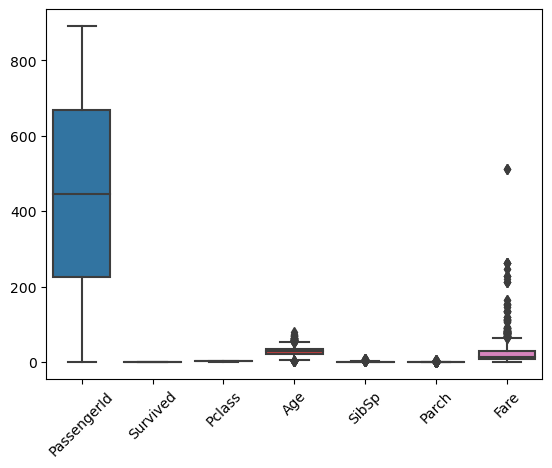

In [71]:
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

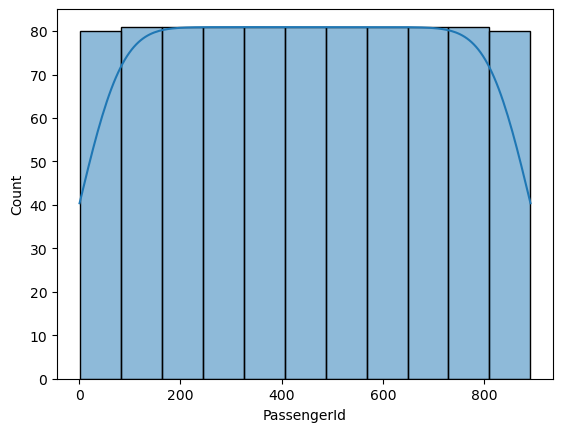

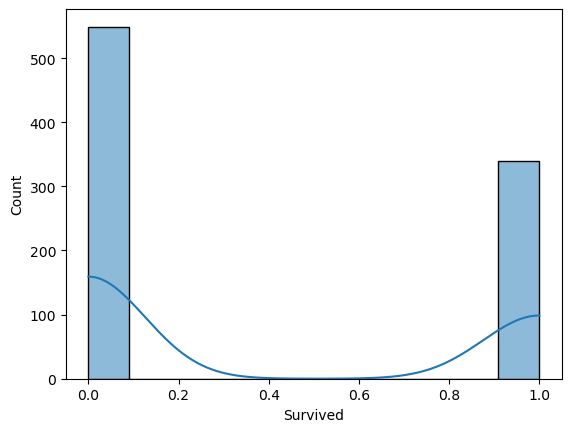

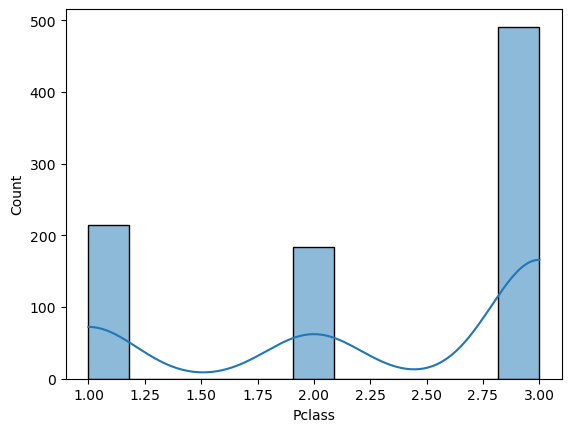

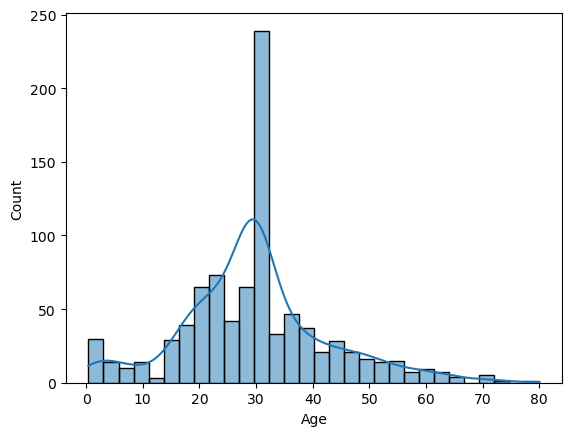

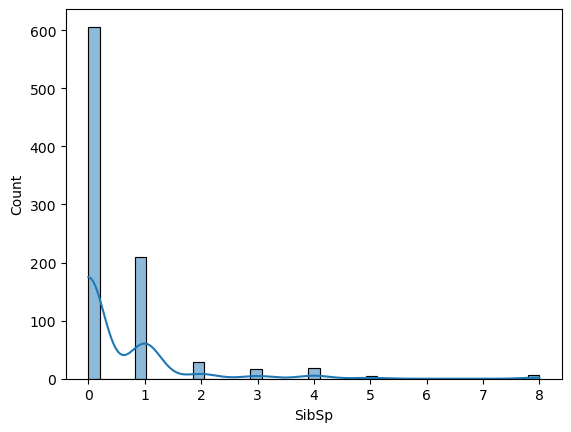

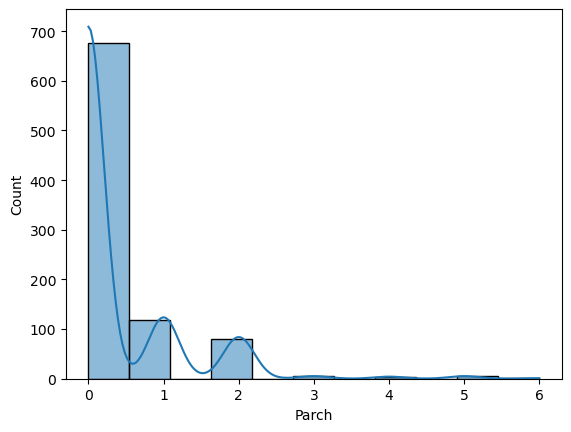

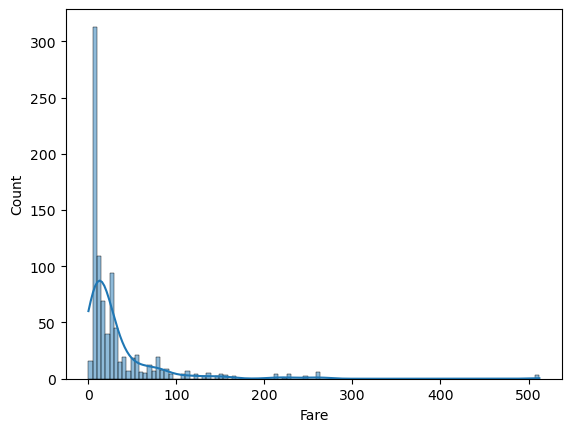

In [72]:
for i in df.select_dtypes(exclude='object'):
    sns.histplot(data=df, x=i, kde=True)
    plt.show()

### 6. SUMMARY
> Summarize the analysis process:
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

In [117]:
gender = df['Sex'].value_counts()
print("Gender of passengers:")
print(gender_mean)

Gender of passengers:
male      577
female    312
Name: Sex, dtype: int64


In [114]:
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
male_not_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 0)].shape[0]

print("Male Survived:", male_survived)
print("Male Not Survived:", male_not_survived)

Male Survived: 109
Male Not Survived: 468


In [116]:
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
female_not_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 0)].shape[0]

print("Female Survived:", female_survived)
print("Female Not Survived:", female_not_survived)

Female Survived: 231
Female Not Survived: 81


In [105]:
survived_count = df['Survived'].sum()
print("Number of people who survived:", survived_count)

Number of people who survived: 340


In [106]:
total_survived = df['Survived'].sum()

print("Passenger class distribution who survived:")
print(survived_by_class)

Passenger class distribution who survived:
1    133
3    112
2     80
Name: Pclass, dtype: int64


In [110]:
child_age = (df['Age'] >= 0) & (df['Age'] <= 12)
adult_age = (df['Age'] >= 13) & (df['Age'] <= 59)
old_age = (df['Age'] >= 60)

total_children = df[child_age].shape[0]
total_adults = df[adult_age].shape[0]
total_olds = df[old_age].shape[0]

print("Passenger Distribution by Age Categories")
print("Children (0 - 12) :", total_children)
print("Adults (13 - 59)  :", total_adults)
print("Olds (>59)        :", total_olds)

Passenger Distribution by Age Categories
Children (0 - 12) : 69
Adults (13 - 59)  : 795
Olds (>59)        : 25


In [111]:
child_age = (df['Age'] >= 0) & (df['Age'] <= 12)
adult_age = (df['Age'] >= 13) & (df['Age'] <= 59)
old_age = (df['Age'] >= 60)

survived = df[df['Survived'] == 1]

survived_children = survived[child_age].shape[0]
survived_adults = survived[adult_age].shape[0]
survived_olds = survived[old_age].shape[0]

print("Passenger Distribution by Age Categories among Survivors")
print("Children (0 - 12) :", survived_children)
print("Adults (13 - 59)  :", survived_adults)
print("Olds (>59)        :", survived_olds)

Passenger Distribution by Age Categories among Survivors
Children (0 - 12) : 40
Adults (13 - 59)  : 294
Olds (>59)        : 6
